In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [2]:
df = pd.read_csv('review.csv')
print(df.shape)

(1, 5)


In [3]:
df.head()

,id,review,date,product_id,user_id
0,38,ok food,2024-03-24,5,3


In [4]:
example = df['review'][0]
print(example)

ok food


In [5]:
tokens = nltk.word_tokenize(example)
tokens

['ok', 'food']

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
analyzer = SentimentIntensityAnalyzer()

In [7]:
sentiment = analyzer.polarity_scores(example)
print(sentiment)

{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}


In [8]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['user_id']
    res[myid] = analyzer.polarity_scores(text)

  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
print(res)
sum = 0
for i,n in res.items():
    sum += n['compound'] 
avg = sum/len(res)
print(avg)

{3: {'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}}
0.296


In [10]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
# vaders = vaders.merge(df, how='left')

In [11]:
vaders.head()

,Id,neg,neu,pos,compound
0,3,0.0,0.312,0.688,0.296


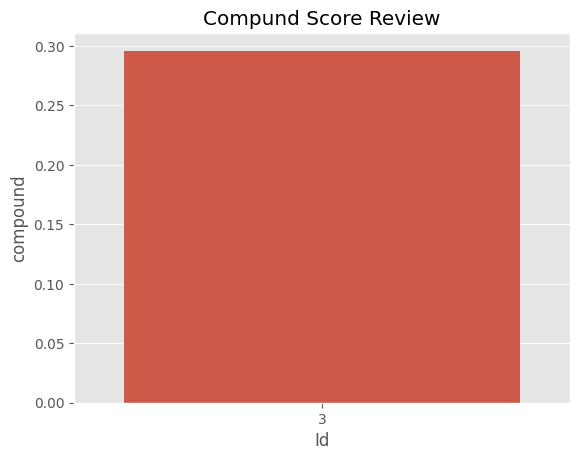

In [12]:
ax = sns.barplot(data=vaders, x='Id', y='compound')
ax.set_title('Compund Score Review')
plt.show()